<a href="https://colab.research.google.com/github/Mathurshab2210/Ml_with_Mathur/blob/main/Car_pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
car=pd.read_csv('/content/car data.csv')

In [5]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [10]:
car.shape

(301, 9)

In [11]:
 car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
#checking distribution of categorical data

In [25]:

car.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [26]:
car.Fuel_Type.value_counts()

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64

In [27]:
car.Transmission.value_counts()

1    261
0     40
Name: Transmission, dtype: int64

In [24]:
#encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
car['Fuel_Type'] = lb.fit_transform(car['Fuel_Type'] )
car['Transmission']=lb.fit_transform(car['Transmission'] )
car['Seller_Type']=lb.fit_transform(car['Seller_Type'] )

In [22]:
car.Fuel_Type

0      2
1      1
2      2
3      2
4      1
      ..
296    1
297    2
298    2
299    1
300    2
Name: Fuel_Type, Length: 301, dtype: int64

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [31]:
x=car.drop(['Car_Name','Selling_Price'],axis=1)

In [32]:
y=car['Selling_Price']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(240, 7)

In [42]:
#linear reg.
lr=LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
traindatapred=lr.predict(x_train)

In [45]:
#R squard error
er_scr=metrics.r2_score(y_train,traindatapred)
er_scr

0.8839793496750797

In [46]:
testdatapred=lr.predict(x_test)

In [47]:
er_scr=metrics.r2_score(y_test,testdatapred)
er_scr

0.8468053957655803

In [48]:
#visualize actual and predicted

Text(0, 0.5, 'predicted')

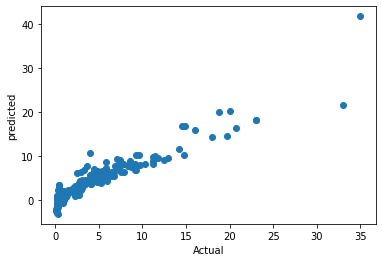

In [52]:
plt.scatter(y_train,traindatapred)
plt.xlabel('Actual')
plt.ylabel('predicted')

Text(0, 0.5, 'predicted')

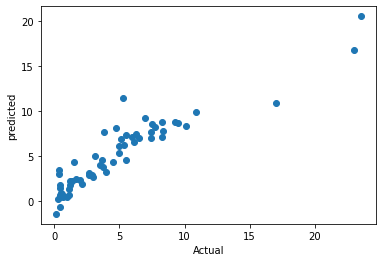

In [53]:
plt.scatter(y_test,testdatapred)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [55]:
#lasso reg.
lr=Lasso()

In [64]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [56]:
lr.fit(x_train,y_train)

Lasso()

In [57]:
traindatapred=lr.predict(x_train)

In [58]:
#R squard error
er_scr=metrics.r2_score(y_train,traindatapred)
er_scr

0.848030286813716

In [59]:
testdatapred=lr.predict(x_test)

In [60]:
er_scr=metrics.r2_score(y_test,testdatapred)
er_scr

0.798551246128469

In [61]:
#visualize actual and predicted

Text(0, 0.5, 'predicted')

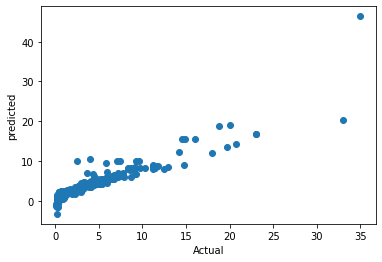

In [62]:
plt.scatter(y_train,traindatapred)
plt.xlabel('Actual')
plt.ylabel('predicted')

Text(0, 0.5, 'predicted')

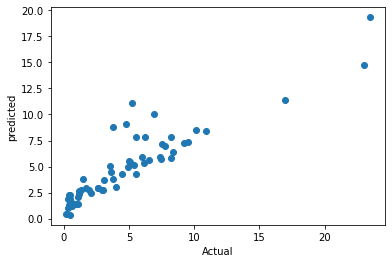

In [63]:
plt.scatter(y_test,testdatapred)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [68]:
lr.predict([[2017	,9.85	,6900	,2	,0	,1	,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([6.95150559])

In [66]:
x_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,2008,0.750,26000,2,1,1,1
132,2017,0.950,3500,2,1,1,0
194,2008,0.787,50000,2,1,1,0
75,2015,6.800,36000,2,0,1,0
111,2016,1.500,8700,2,1,1,0
